In [1]:
import pandas as pd
import requests
from tqdm import tqdm
import json
import os
from urllib.request import urlopen
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def getLottoWinInfo(startRound, endRound):
    drwtNo1 = []
    drwtNo2 = []
    drwtNo3 = []
    drwtNo4 = []
    drwtNo5 = []
    drwtNo6 = []
    bnusNo = []
    totSellamnt = []
    drwNoDate = []
    firstAccumamnt = []
    firstPrzwnerCo = []
    firstWinamnt = []
    roundNo = []
    
    for i in tqdm(range(startRound, endRound+1, 1)):
        # i = 1
        req_url = "https://www.dhlottery.co.kr/common.do?method=getLottoNumber&drwNo=" + str(i)
        
        req_lotto = requests.get(req_url)
        
        lottoNo = req_lotto.json()
        
        drwtNo1.append(lottoNo['drwtNo1'])
        drwtNo2.append(lottoNo['drwtNo2'])
        drwtNo3.append(lottoNo['drwtNo3'])
        drwtNo4.append(lottoNo['drwtNo4'])
        drwtNo5.append(lottoNo['drwtNo5'])
        drwtNo6.append(lottoNo['drwtNo6'])
        bnusNo.append(lottoNo['bnusNo'])
        roundNo.append(i)
        
        totSellamnt.append(lottoNo['totSellamnt'])
        drwNoDate.append(lottoNo['drwNoDate'])
        firstAccumamnt.append(lottoNo['firstAccumamnt'])
        firstPrzwnerCo.append(lottoNo['firstPrzwnerCo'])
        firstWinamnt.append(lottoNo['firstWinamnt'])
        
        lotto_dict = {"추첨일":drwNoDate, "회차":roundNo, "Num1":drwtNo1, 
                      "Num2":drwtNo2, "Num3":drwtNo3, "Num4":drwtNo4, 
                      "Num5":drwtNo5, "Num6":drwtNo6, "bnsNum":bnusNo, 
                      "총판매금액":totSellamnt, "총1등당첨금":firstAccumamnt, 
                      "1등당첨인원":firstPrzwnerCo, "1등수령액":firstWinamnt}

        #lotto_df = pd.DataFrame(lotto_dict)
        
         # pandas로 변환
        db = pd.DataFrame(lotto_dict)
        
        # csv 파일로 저장
        db.to_csv("lotto_win_info.csv", header=True, encoding='utf-8-sig')

   
    #return  lotto_df

In [2]:
db=getLottoWinInfo(1, 939)

100%|██████████| 939/939 [02:09<00:00,  7.27it/s]


In [3]:
df=pd.read_csv("lotto_win_info.csv")
df.shape

(939, 14)

In [4]:
df.head(30)

,Unnamed: 0,추첨일,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
0,0,2002-12-07,1,10,23,29,33,37,40,16,3681782000,863604600,0,0
1,1,2002-12-14,2,9,13,21,25,32,42,2,4904274000,0,1,2002006800
2,2,2002-12-21,3,11,16,19,21,27,31,30,4729342000,0,1,2000000000
3,3,2002-12-28,4,14,27,30,31,40,42,2,5271464000,1267147200,0,0
4,4,2003-01-04,5,16,24,29,40,41,42,3,6277102000,3041094900,0,0
5,5,2003-01-11,6,14,15,26,27,40,42,34,15305356000,0,1,6574451700
6,6,2003-01-18,7,2,9,16,25,26,40,42,12794890000,2600913000,0,0
7,7,2003-01-25,8,8,19,25,34,37,39,9,20751450000,7336896000,0,0
8,8,2003-02-01,9,2,4,16,17,36,39,14,73624020000,25803852000,0,0
9,9,2003-02-08,10,9,25,30,33,41,44,6,260856392000,0,13,6430437900


In [5]:
#개수, 평균, 표준편차, 최대최소
pd.options.display.float_format = '{:,.12}'.format  # 깔끔하게 나오게 하기 위해
df.describe()

,Unnamed: 0,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
count,939.0,939.0,939.0,939.0,939.0,939.0,939.0,939.0,939.0,939.0,939.0,939.0,939.0
mean,469.0,470.0,6.65495207668,13.0638977636,19.9424920128,26.2502662407,32.8477103301,39.5111821086,22.3077742279,"60,205,258,346.1","10,535,584,396.6",7.02129925453,"2,735,270,627.44"
std,271.210250544,271.210250544,5.29192615032,6.88716290908,7.49177904583,7.6654589984,6.89266030454,5.31308002857,13.2131151025,"16,617,614,703.2","7,594,041,363.14",3.76998215836,"2,605,532,129.81"
min,0.0,1.0,1.0,2.0,3.0,5.0,9.0,19.0,1.0,"3,681,782,000.0",0.0,0.0,0.0
25%,234.5,235.5,2.5,8.0,14.0,21.0,28.0,37.0,11.0,"47,711,823,500.0",0.0,4.0,"1,524,347,876.0"
50%,469.0,470.0,5.0,12.0,19.0,26.0,34.0,41.0,22.0,"57,479,716,000.0","12,835,983,375.0",7.0,"2,035,475,025.0"
75%,703.5,704.5,10.0,17.5,25.5,32.0,38.0,44.0,34.0,"70,770,897,000.0","16,196,761,314.0",9.0,"3,127,425,777.5"
max,938.0,939.0,35.0,37.0,40.0,43.0,44.0,45.0,45.0,2.60856392e+11,"43,624,374,375.0",30.0,"40,722,959,400.0"


In [6]:
# 1~6번 번호만 가져오자
df_only_number=pd.DataFrame([df['Num1'], df['Num2'], df['Num3'], 
                             df['Num4'], df['Num5'], df['Num6']]).T

pd.options.display.float_format = '{:,.5}'.format  # 깔끔하게 나오게 하기 위해

for i in range(1, 7):
    print('%d 번 번호 평균 : %d' % (i, int(df_only_number.mean()[i-1])))
    
df_only_number.describe()

1 번 번호 평균 : 6
2 번 번호 평균 : 13
3 번 번호 평균 : 19
4 번 번호 평균 : 26
5 번 번호 평균 : 32
6 번 번호 평균 : 39


,Num1,Num2,Num3,Num4,Num5,Num6
count,939.0,939.0,939.0,939.0,939.0,939.0
mean,6.655,13.064,19.942,26.25,32.848,39.511
std,5.2919,6.8872,7.4918,7.6655,6.8927,5.3131
min,1.0,2.0,3.0,5.0,9.0,19.0
25%,2.5,8.0,14.0,21.0,28.0,37.0
50%,5.0,12.0,19.0,26.0,34.0,41.0
75%,10.0,17.5,25.5,32.0,38.0,44.0
max,35.0,37.0,40.0,43.0,44.0,45.0


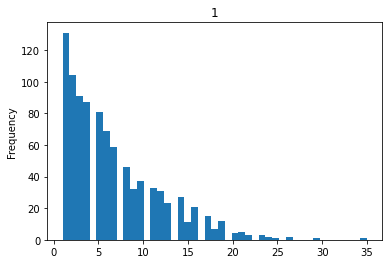

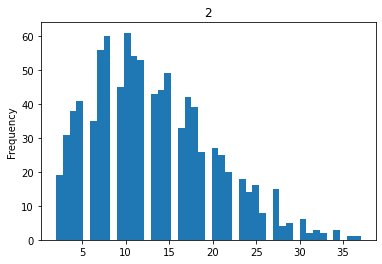

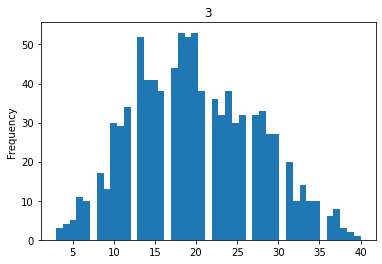

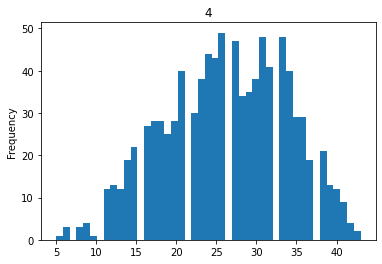

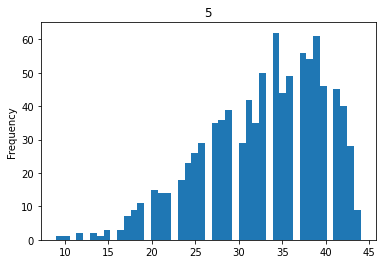

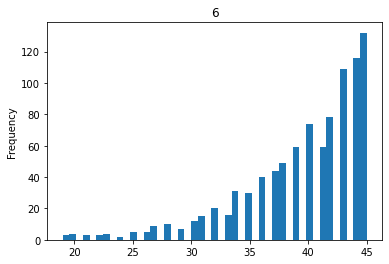

In [7]:
#각 당첨번호들의 histogram
df_only_number['Num1'].plot.hist(bins=45)
plt.title('1')
plt.show()

df_only_number['Num2'].plot.hist(bins=45)
plt.title('2')
plt.show()

df_only_number['Num3'].plot.hist(bins=45)
plt.title('3')
plt.show()

df_only_number['Num4'].plot.hist(bins=45)
plt.title('4')
plt.show()

df_only_number['Num5'].plot.hist(bins=45)
plt.title('5')
plt.show()

df_only_number['Num6'].plot.hist(bins=45)
plt.title('6')
plt.show()

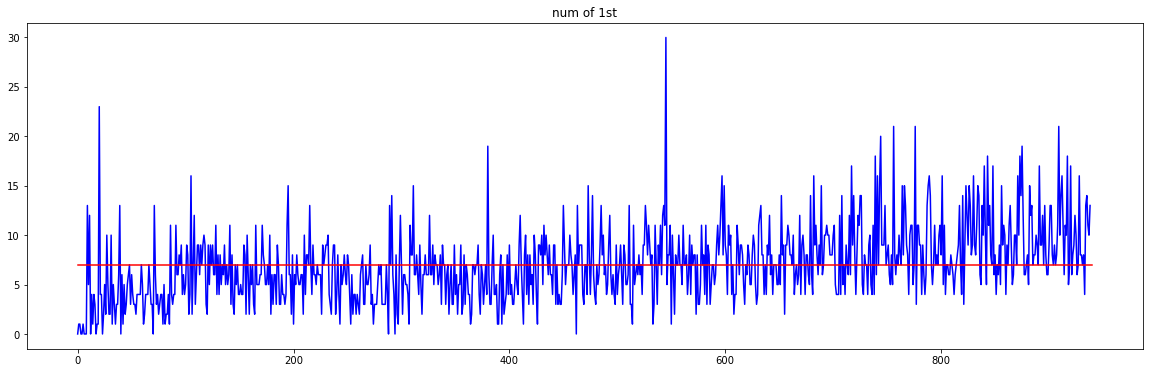

In [8]:
#특정 회에 1등이 몇 번 당첨되었는지
df['1등당첨인원'].plot(figsize=(20,6),color = 'blue')
plt.plot(list(range((len(df['1등당첨인원'])+2))), [df['1등당첨인원'].mean()]*(len(df['1등당첨인원'])+2), 'red')
plt.title('num of 1st')
plt.show()

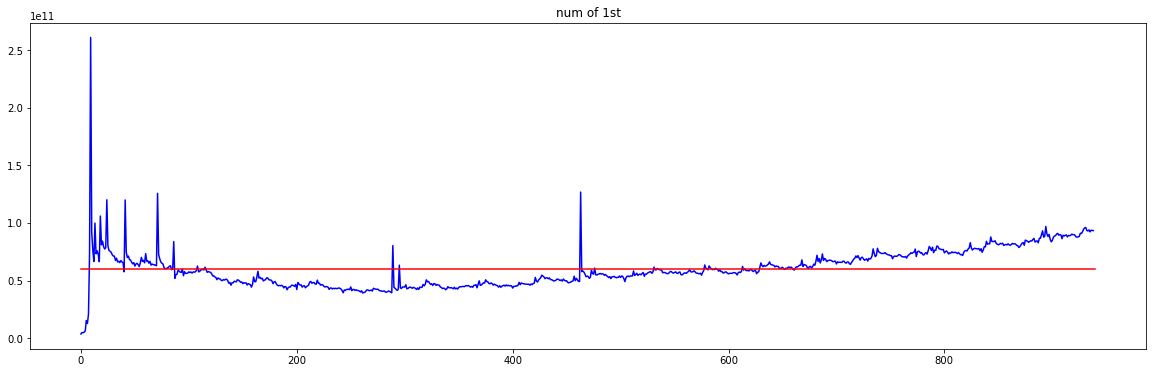

In [9]:
#총 판매금액 추이
df['총판매금액'].plot(figsize=(20,6),color = 'b')
plt.plot(list(range((len(df['총판매금액'])+2))), [df['총판매금액'].mean()]*(len(df['총판매금액'])+2), 'red')
plt.title('num of 1st')
plt.show()

평균 갯수 : 125


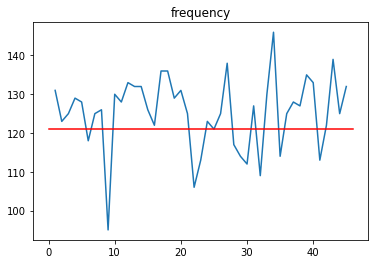

In [10]:
numm_tmp = pd.concat([df_only_number['Num1'], df_only_number['Num2'], df_only_number['Num3'], df_only_number['Num4'], df_only_number['Num5'], df_only_number['Num6']])
numm_tmp1 = numm_tmp.value_counts().sort_index()
print('평균 갯수 : %.0f' % (numm_tmp1.mean()))
plt.plot(numm_tmp1)
plt.plot(list(range((len(numm_tmp1)+2))), [121]*(len(numm_tmp1)+2), 'red')
plt.title('frequency')
plt.show()

In [11]:
print('많이 나온 숫자들 : %s\n\n%s' % (list(numm_tmp1.sort_values()[39:].keys().sort_values()), numm_tmp1.sort_values()[:6]))

많이 나온 숫자들 : [17, 18, 27, 34, 39, 43]

9      95
22    106
32    109
30    112
41    113
23    113
dtype: int64


In [12]:
lotto_df = pd.read_csv("lotto_win_info.csv")
lotto_df.to_csv("lotto_win_info.csv", index=False)

In [13]:
pd.read_csv("lotto_win_info.csv")

,Unnamed: 0,추첨일,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
0,0,2002-12-07,1,10,23,29,33,37,40,16,3681782000,863604600,0,0
1,1,2002-12-14,2,9,13,21,25,32,42,2,4904274000,0,1,2002006800
2,2,2002-12-21,3,11,16,19,21,27,31,30,4729342000,0,1,2000000000
3,3,2002-12-28,4,14,27,30,31,40,42,2,5271464000,1267147200,0,0
4,4,2003-01-04,5,16,24,29,40,41,42,3,6277102000,3041094900,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,934,2020-10-31,935,4,10,20,32,38,44,18,93934898000,22243720512,13,1711055424
935,935,2020-11-07,936,7,11,13,17,18,29,43,92246146000,20888968506,14,1492069179
936,936,2020-11-14,937,2,10,13,22,29,40,26,93720454000,22642629009,11,2058420819
937,937,2020-11-21,938,4,8,10,16,31,36,9,93452425000,22494665630,10,2249466563


In [14]:
#Num1~Num6 열의 데이터를 하나의 list로 생성
num_list = list(lotto_df['Num1']) + list(lotto_df['Num2']) + list(lotto_df['Num3']) + list(lotto_df['Num4']) + list(lotto_df['Num5']) + list(lotto_df['Num6'])

In [15]:
from collections import Counter
count = Counter(num_list)
common_num_45 = count.most_common(45)

In [16]:
count

Counter({10: 130,
         9: 95,
         11: 128,
         14: 132,
         16: 122,
         2: 123,
         8: 126,
         1: 131,
         22: 106,
         3: 125,
         6: 118,
         4: 129,
         5: 128,
         7: 125,
         13: 132,
         17: 136,
         26: 125,
         12: 133,
         19: 129,
         21: 125,
         24: 123,
         15: 126,
         35: 114,
         18: 136,
         25: 121,
         23: 113,
         20: 131,
         29: 114,
         27: 138,
         30: 112,
         31: 127,
         32: 109,
         28: 117,
         34: 146,
         36: 125,
         33: 130,
         37: 128,
         38: 127,
         39: 135,
         40: 133,
         42: 122,
         41: 113,
         43: 139,
         44: 125,
         45: 132})

In [17]:
common_num_45

[(34, 146),
 (43, 139),
 (27, 138),
 (17, 136),
 (18, 136),
 (39, 135),
 (12, 133),
 (40, 133),
 (14, 132),
 (13, 132),
 (45, 132),
 (1, 131),
 (20, 131),
 (10, 130),
 (33, 130),
 (4, 129),
 (19, 129),
 (11, 128),
 (5, 128),
 (37, 128),
 (31, 127),
 (38, 127),
 (8, 126),
 (15, 126),
 (3, 125),
 (7, 125),
 (26, 125),
 (21, 125),
 (36, 125),
 (44, 125),
 (2, 123),
 (24, 123),
 (16, 122),
 (42, 122),
 (25, 121),
 (6, 118),
 (28, 117),
 (35, 114),
 (29, 114),
 (23, 113),
 (41, 113),
 (30, 112),
 (32, 109),
 (22, 106),
 (9, 95)]

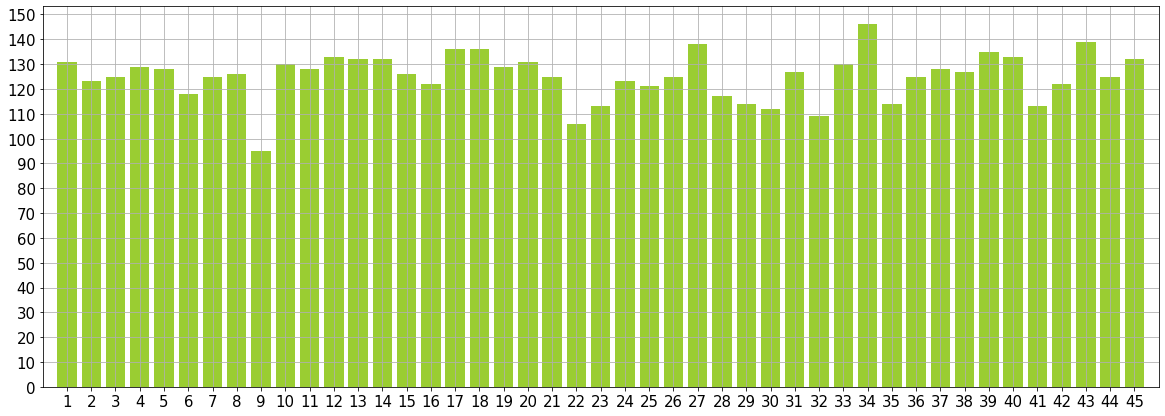

In [18]:
#로또 분석 번호를 그래프로 표시

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams["font.size"] = 15
plt.figure(figsize=(20,7))
x = [x for x in count.values()]
y = [y for y in count.keys()]
plt.grid(True)
plt.xticks(np.arange(1,46))
plt.yticks(np.arange(0,250,10))
plt.xlim(0,46)
plt.bar(y,x, color='yellowgreen')
plt.show()

In [19]:
common_num_10 = count.most_common(10)

In [20]:
#당첨번호로 가장 많이 등장한 숫자 10개
common_num_10

[(34, 146),
 (43, 139),
 (27, 138),
 (17, 136),
 (18, 136),
 (39, 135),
 (12, 133),
 (40, 133),
 (14, 132),
 (13, 132)]

In [21]:
#1등 당첨금 수령액이 가장 높았던 날 상위 10
lotto_df.sort_values(by=['1등수령액'], axis=0, ascending=False).head(10)

,Unnamed: 0,추첨일,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
18,18,2003-04-12,19,6,30,38,39,40,43,26,105957818000,0,1,40722959400
24,24,2003-05-24,25,2,4,21,26,43,44,16,120073768000,0,2,24227745300
19,19,2003-04-19,20,10,14,18,20,23,30,41,81056776000,0,1,19352212800
42,42,2003-09-27,43,6,31,35,38,39,44,1,74686296000,0,1,17749630800
14,14,2003-03-15,15,3,4,16,30,31,37,13,73264910000,0,1,17014245000
35,35,2003-08-09,36,1,10,23,26,28,40,31,66856686000,0,1,16014475800
61,61,2004-02-07,62,3,8,15,27,29,35,21,66740368000,0,1,15817286400
32,32,2003-07-19,33,4,7,32,33,40,41,9,67457252000,0,1,14903517600
81,81,2004-06-26,82,1,2,3,14,27,42,39,61302808000,0,1,14562494400
85,85,2004-07-24,86,2,12,37,39,41,45,33,59835968000,0,1,14252186400


In [22]:
#1등 당첨자가 가장 많았던 날 상위 10
lotto_df.sort_values(by=['1등당첨인원'], axis=0, ascending=False).head(10)

,Unnamed: 0,추첨일,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
545,545,2013-05-18,546,8,17,20,27,37,43,6,56713166000,12178198500,30,405939950
20,20,2003-04-26,21,6,12,17,18,31,32,21,84247142000,0,23,797475400
776,776,2017-10-21,777,6,12,17,21,34,37,18,75534360000,17502828756,21,833468036
756,756,2017-06-03,757,6,7,11,17,33,44,1,71053002000,15536637018,21,739839858
909,909,2020-05-09,910,1,11,17,27,35,39,31,86308857000,19767643875,21,941316375
744,744,2017-03-11,745,1,2,3,9,12,23,10,73575119000,14936459640,20,746822982
380,380,2010-03-20,381,1,5,10,12,16,20,11,47943113000,10749039900,19,565738895
875,875,2019-09-14,876,5,16,21,26,34,42,24,85088368000,20722499264,19,1090657856
873,873,2019-08-31,874,1,15,19,23,28,42,32,82990138000,20108230506,18,1117123917
843,843,2019-02-02,844,7,8,13,15,33,45,18,87805610000,20933343756,18,1162963542


In [23]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


#### DB안의 데이터를 원하는 방식으로 읽어와 DataFrame에 넣는 작업을 진행. 필요할것 같은 조건으로 DB에 있는 데이터를 불러오는 함수를 미리 만든다.
### 필요한 모듈
MongoDB를 사용하기 위해 pymongo  
DataFrame을 사용하기 위해 pandas

In [32]:
df=pd.read_csv("lotto_win_info.csv")
df.shape

(939, 14)

### 특정 값과 일치하는 데이터 필터링하기
### 1. 전체 로또 당첨 정보

In [35]:
df.head(939)

,Unnamed: 0,추첨일,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
0,0,2002-12-07,1,10,23,29,33,37,40,16,3681782000,863604600,0,0
1,1,2002-12-14,2,9,13,21,25,32,42,2,4904274000,0,1,2002006800
2,2,2002-12-21,3,11,16,19,21,27,31,30,4729342000,0,1,2000000000
3,3,2002-12-28,4,14,27,30,31,40,42,2,5271464000,1267147200,0,0
4,4,2003-01-04,5,16,24,29,40,41,42,3,6277102000,3041094900,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,934,2020-10-31,935,4,10,20,32,38,44,18,93934898000,22243720512,13,1711055424
935,935,2020-11-07,936,7,11,13,17,18,29,43,92246146000,20888968506,14,1492069179
936,936,2020-11-14,937,2,10,13,22,29,40,26,93720454000,22642629009,11,2058420819
937,937,2020-11-21,938,4,8,10,16,31,36,9,93452425000,22494665630,10,2249466563


### 2. 지정 회차 로또 당첨 정보

In [37]:
# 회차 컬럼을 선택합니다.
# 컬럼의 값과 조건을 비교합니다.
# 그 결과를 새로운 변수에 할당합니다.
is_회차 = df['회차'] == 100

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
회차 = df[is_회차]

# 결과를 출력합니다.
회차

,Unnamed: 0,추첨일,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
99,99,2004-10-30,100,1,7,11,23,37,42,6,56561977000,0,4,3315315525


### 3. 최근 n회 로또 당첨 정보

In [38]:
# 회차 컬럼을 선택합니다.
# 컬럼의 값과 조건을 비교합니다.
# 그 결과를 새로운 변수에 할당합니다.
is_회차 = df['회차'] >= 900

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
회차 = df[is_회차]

# 결과를 출력합니다.
회차

,Unnamed: 0,추첨일,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
899,899,2020-02-29,900,7,13,16,18,35,38,14,83639372000,20099108250,6,3349851375
900,900,2020-03-07,901,5,18,20,23,30,34,21,84783962000,20411772003,9,2267974667
901,901,2020-03-14,902,7,19,23,24,36,39,30,87501981000,21051127877,13,1619317529
902,902,2020-03-21,903,2,15,16,21,22,28,45,88625160000,21899568756,13,1684582212
903,903,2020-03-28,904,2,6,8,26,43,45,11,88938220000,21744622504,8,2718077813
904,904,2020-04-04,905,3,4,16,27,38,40,20,90357634000,21125037752,7,3017862536
905,905,2020-04-11,906,2,5,14,28,31,32,20,90948274000,22253465250,9,2472607250
906,906,2020-04-18,907,21,27,29,38,40,44,37,89331282000,22155413252,7,3165059036
907,907,2020-04-25,908,3,16,21,22,23,44,30,89923601000,22678849128,8,2834856141
908,908,2020-05-02,909,7,24,29,30,34,35,33,89543261000,22231691625,11,2021062875


### 4. 특정 회차 이전 n회 로또 당첨 정보

In [39]:
# 회차 컬럼을 선택합니다.
# 컬럼의 값과 조건을 비교합니다.
# 그 결과를 새로운 변수에 할당합니다.
is_회차 = df['회차'] <400

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
회차 = df[is_회차]

# 결과를 출력합니다.
회차

,Unnamed: 0,추첨일,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
0,0,2002-12-07,1,10,23,29,33,37,40,16,3681782000,863604600,0,0
1,1,2002-12-14,2,9,13,21,25,32,42,2,4904274000,0,1,2002006800
2,2,2002-12-21,3,11,16,19,21,27,31,30,4729342000,0,1,2000000000
3,3,2002-12-28,4,14,27,30,31,40,42,2,5271464000,1267147200,0,0
4,4,2003-01-04,5,16,24,29,40,41,42,3,6277102000,3041094900,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,394,2010-06-26,395,11,15,20,26,31,35,7,46192580000,10742445000,7,1534635000
395,395,2010-07-03,396,18,20,31,34,40,45,30,45463736000,10593244800,2,5296622400
396,396,2010-07-10,397,12,13,17,22,25,33,8,45890007000,10498559100,3,3499519700
397,397,2010-07-17,398,10,15,20,23,42,44,7,45427304000,10722502200,4,2680625550


### 5. 특정 회차 이후 n회 로또 당첨 정보

In [40]:
# 회차 컬럼을 선택합니다.
# 컬럼의 값과 조건을 비교합니다.
# 그 결과를 새로운 변수에 할당합니다.
is_회차 = df['회차'] > 500

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
회차 = df[is_회차]

# 결과를 출력합니다.
회차

,Unnamed: 0,추첨일,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
500,500,2012-07-07,501,1,4,10,17,31,42,2,52717711000,12100800375,4,3025200094
501,501,2012-07-14,502,6,22,28,32,34,40,26,54000640000,13208748750,6,2201458125
502,502,2012-07-21,503,1,5,27,30,34,36,40,53572205000,12975444375,7,1853634911
503,503,2012-07-28,504,6,14,22,26,43,44,31,51787037000,12989132625,9,1443236959
504,504,2012-08-04,505,7,20,22,25,38,40,44,49103223000,11507731125,6,1917955188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,934,2020-10-31,935,4,10,20,32,38,44,18,93934898000,22243720512,13,1711055424
935,935,2020-11-07,936,7,11,13,17,18,29,43,92246146000,20888968506,14,1492069179
936,936,2020-11-14,937,2,10,13,22,29,40,26,93720454000,22642629009,11,2058420819
937,937,2020-11-21,938,4,8,10,16,31,36,9,93452425000,22494665630,10,2249466563


### 6. 2개 회차 사이의 로또 당첨 정보

In [46]:
# 회차 컬럼을 선택합니다.
# 컬럼의 값과 조건을 비교합니다.
# 그 결과를 새로운 변수에 할당합니다.
#is_회차 = (900 <= df['회차'] <= 939)
is_회차 = df['회차'] 900 >= and  df['회차'] <= 939

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
회차 = df[is_회차]

# 결과를 출력합니다.
회차

SyntaxError: invalid syntax (<ipython-input-46-19982c538637>, line 5)